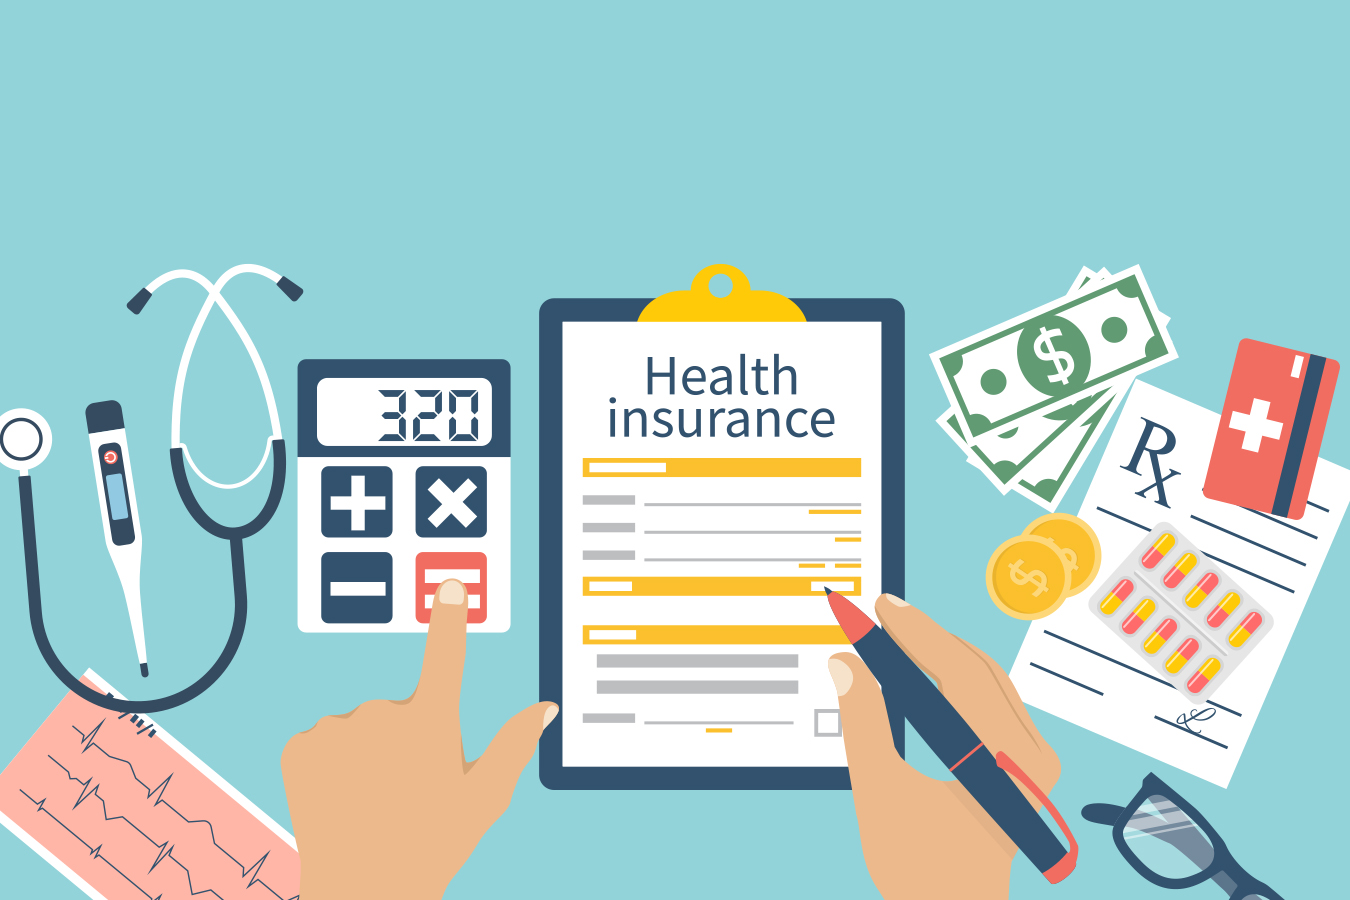

___

# <center>  INSURANCE COST PREDICTION 

### DATAMITES

- Name - Aishwarya Patil
- Email - aishwarya22patil06@gmail.com
- Batch code - 27-MAR-23-CDS-PUN
- Project Id- PRCP-1021-InsCostPred
- Project Team Id - PTID-CDS-AUG-23-1623


# 1. Introduction

### Background
In this project, we aim to predict individual medical costs billed by health insurance (charges) based on various demographic and health-related factors. The goal is to create a machine learning model that accurately predicts insurance charges, which can be valuable for insurance companies in pricing their policies effectively.

### Dataset Description


Link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1021-InsCostPred.zip

We are working with the "insurance.csv" dataset, which contains 1338 observations and 7 features. The dataset includes both numerical and categorical features:

- `age`: Age of the primary beneficiary.
- `sex`: Beneficiary's gender (female or male).
- `bmi`: Body mass index (BMI), a measure of body weight relative to height.
- `children`: Number of children covered by health insurance.
- `smoker`: Smoking status (smoking or non-smoking).
- `region`: Beneficiary's residential area in the US (northeast, southeast, southwest, northwest).
- `charges`: Individual medical costs billed by health insurance (to be predicted).
- `Id`: ID of the beneficiary (not used for modeling).


### Problem Statement


Task 1:- Prepare a complete data analysis report on the given data.

Task 2:-
●	Prepare the data, identifying and extracting key features (both input and output parameters) relevant to the problem you will solve.

●	Build and train a machine learning model. Here you can evaluate different algorithms, settings and see which model is best for your scenario.

Task 3:-  Create a machine learning model to predict the insurance price charged to the customer. The charge depends on various features such as age, type of coverage, amount of coverage needed, gender, body mass index (BMI), region, and other special factors like smoking to determine what health risks the person possesses.


#  Data Analysis Plan

### Data Analysis Steps
The following steps will be undertaken during the data analysis phase:

1. Data loading and initial exploration.
2. Data preprocessing, including handling missing values and encoding categorical variables.
3. Exploratory Data Analysis (EDA) to gain insights into the dataset.
4. Feature selection and engineering to identify key predictors.
5. Model building, evaluation, and comparison.

### Expected Outcomes
We expect to produce the following outcomes:

- A cleaned and preprocessed dataset ready for modeling


___

# IMPORT BASIC LIBRARIES

In [143]:
# import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Reading CSV File

In [144]:
data=pd.read_csv('datasets_13720_18513_insurance(1).csv')

In [145]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# DOMAIN ANALYSIS

1]age : age of policyholder

2]sex: gender of policy holder (female=0, male=1)

3]bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight(kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 steps: average number of walking steps per day

4]children: number of children / dependents of policyholder

5]smoker: smoking state of policyholder (non-smoke=0;smoker=1)

6]region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) charges: individual medical costs billed by health insurance

## Basic Checks

In [146]:
data.head() #first five rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [147]:
data.tail() #last five rows of the data

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [148]:
data.shape #number of rows and columns

(1338, 7)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [150]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [151]:
data.isnull().sum()#Checking missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values

# EXPLORATORY DATA ANALYSIS

In [152]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [153]:
#All the numerical columns
integer_columns = data.select_dtypes(include=['int64','float64'])
integer_columns

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [154]:
#Categorical columns
cat_cols=data.select_dtypes(include=['object'])
cat_cols

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


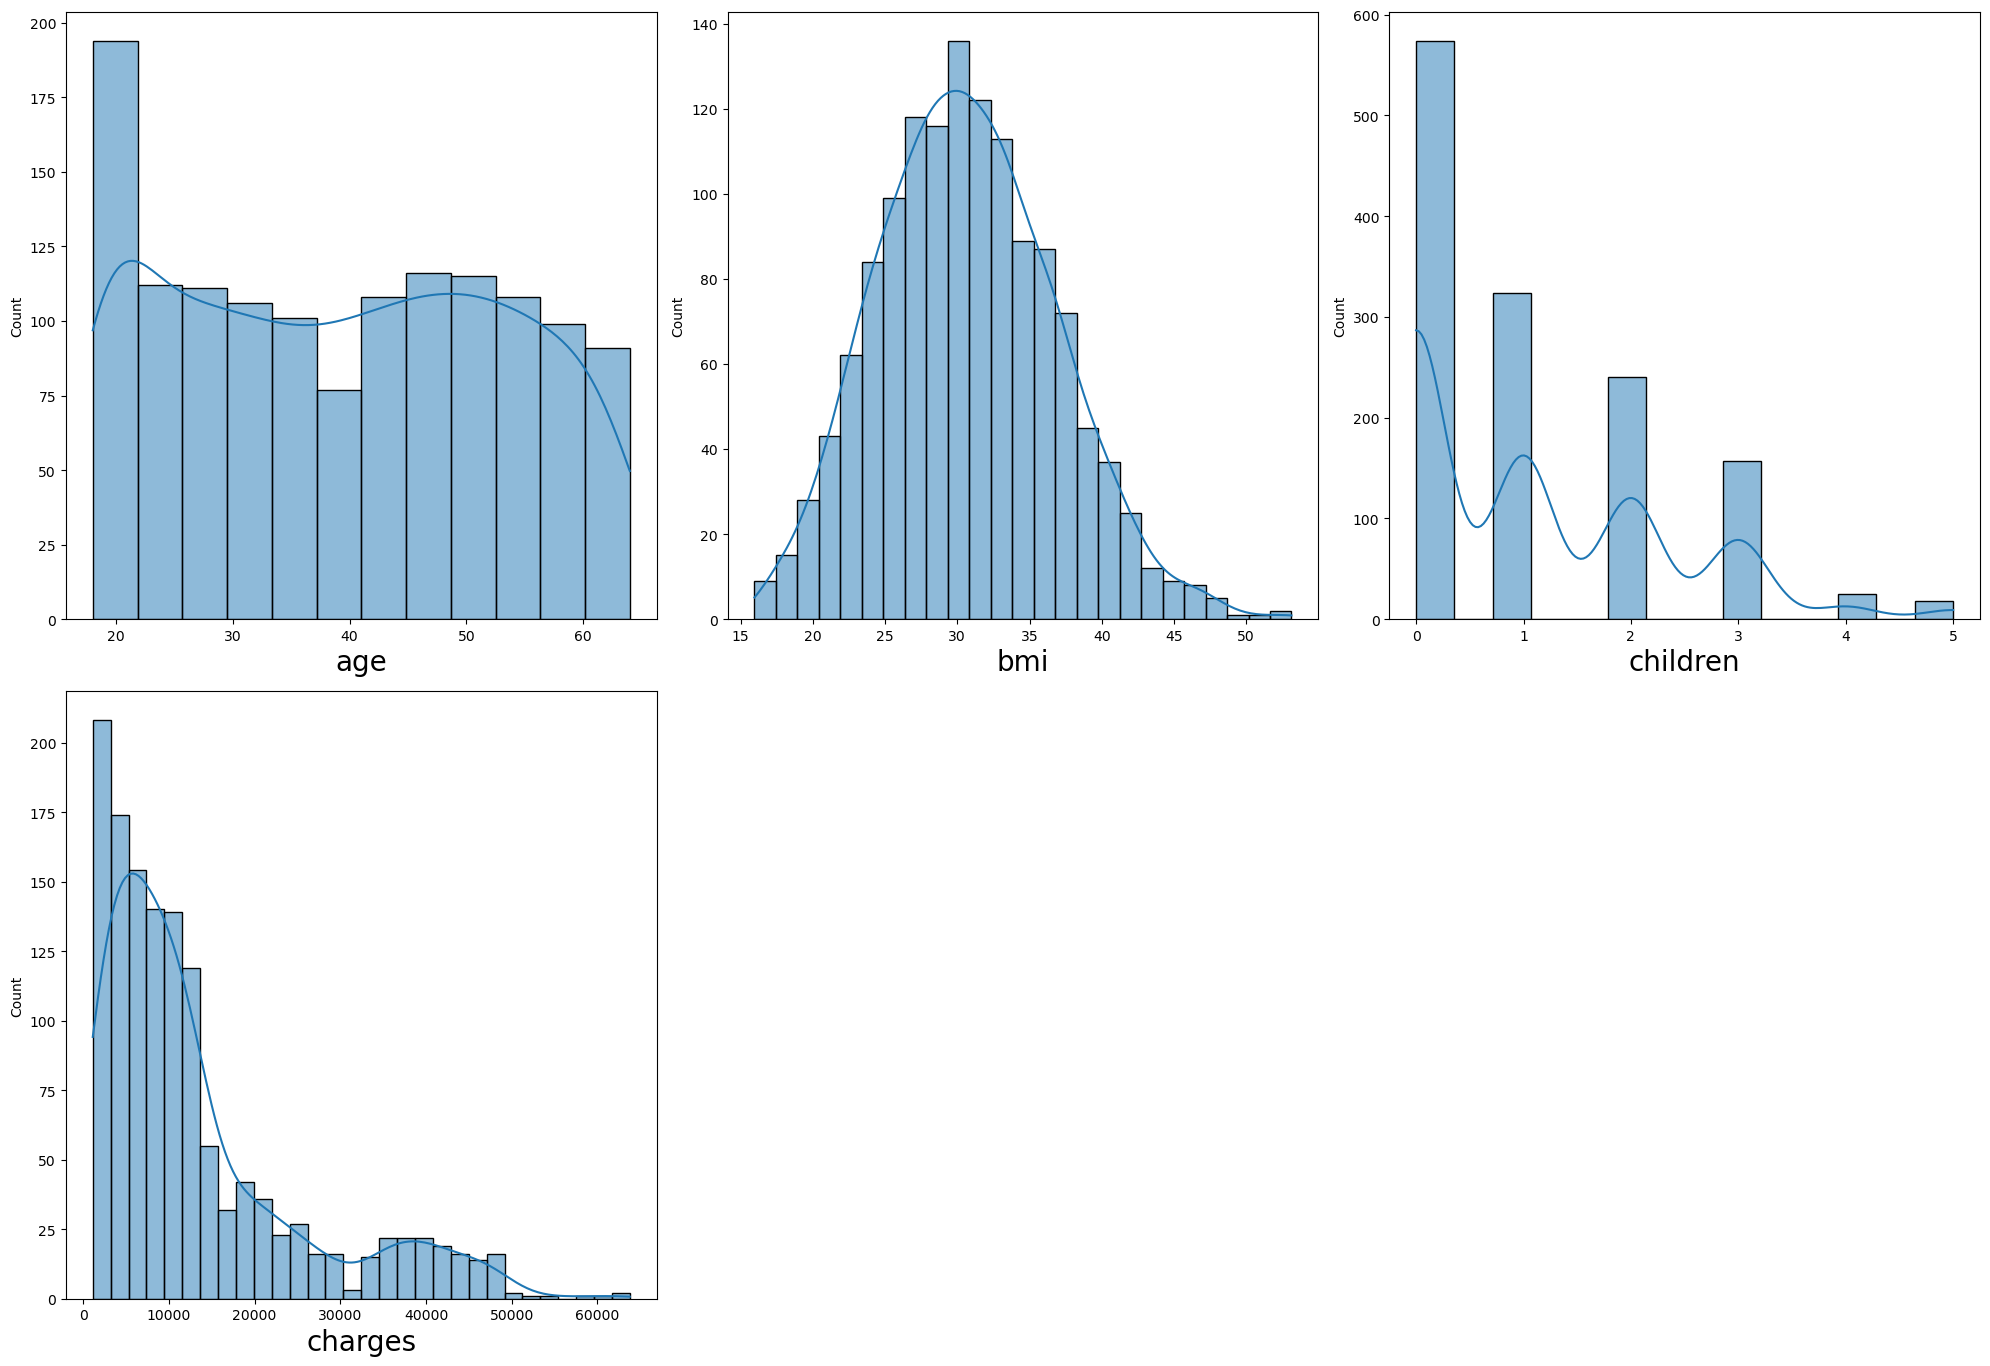

In [155]:
plt.figure(figsize=(20, 20), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in integer_columns:#for loop to acess columns form data1
    if plotnumber<=9 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(3, 3,plotnumber)#plotting 9 graphs in canvas(3 rows and 3 columns)
        sns.histplot(x=columns,data=integer_columns,kde=True)
        plt.xlabel(columns,fontsize=20)#assigning name to x-axis and increasing it's font 
        plotnumber+=1#increasing counter
plt.tight_layout()


**Insights**

1. **Age**: The age distribution in the dataset ranges from below 18 to a maximum of 64 years, with an average age of 39.
2. **BMI (Body Mass Index)**: The BMI values in the dataset exhibit a range from 15 to 38, with a Approximately majority falling between 25 and 38. BMI values below 20 are relatively rare, and exceptionally high BMIs above 45 are infrequent.
3. **Children**: The distribution of the number of children shows that a significant portion of individuals have no children (0), while the highest count for a specific number of children is around 300 for one child. Instances where individuals have 4 or 5 children are relatively rare.
4. **charges**: The insurance charges vary, with the most common range being between 0 and 12,000 units. However, there are instances where insurance charges are as high as 50,000 to 60,000 units, but these cases are less frequent. Approximately 80% of the dataset falls within the range of 0 to 12,000 units for insurance charges. 

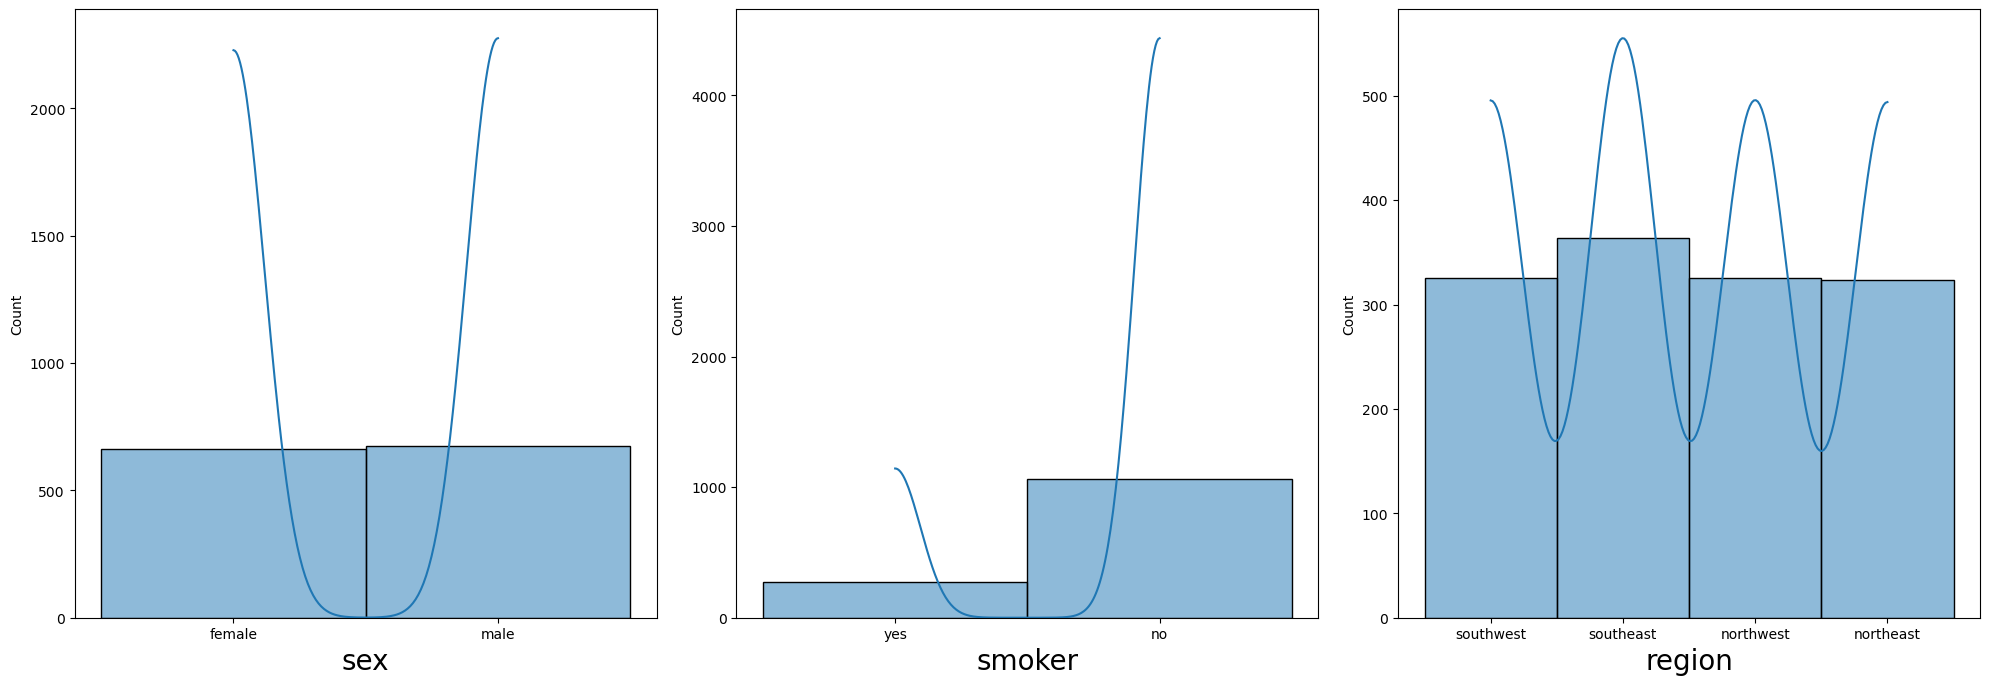

In [156]:
plt.figure(figsize=(20, 20), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in cat_cols:#for loop to acess columns form data1
    if plotnumber<=9 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(3, 3,plotnumber)#plotting 9 graphs in canvas(3 rows and 3 columns)
        sns.histplot(x=columns,data=cat_cols,kde=True)
        plt.xlabel(columns,fontsize=20)#assigning name to x-axis and increasing it's font 
        plotnumber+=1#increasing counter
plt.tight_layout()

#### insights

1. **Sex**: The majority of individuals in the dataset are male.
2. **Smoker**: Approximately 20% of individuals in the dataset are categorized as smokers, while the remaining 80% are non-smokers.
3.  **Region**: The distribution of individuals across different regions (southeast, southwest, northwest, northeast) is fairly balanced, with each region having a comparable number of individuals.    

# Bivariate Analysis

 - Bivariate analysis is one of the statistical analysis where two        variables are observed. One variable here is dependent while the        other is independent. These variables are usually denoted by X and      Y. So, here we analyse the changes occured between the two              variables and to what extent.
   - Bivariate allows only two columns to be analyzed at once

## Charges by region

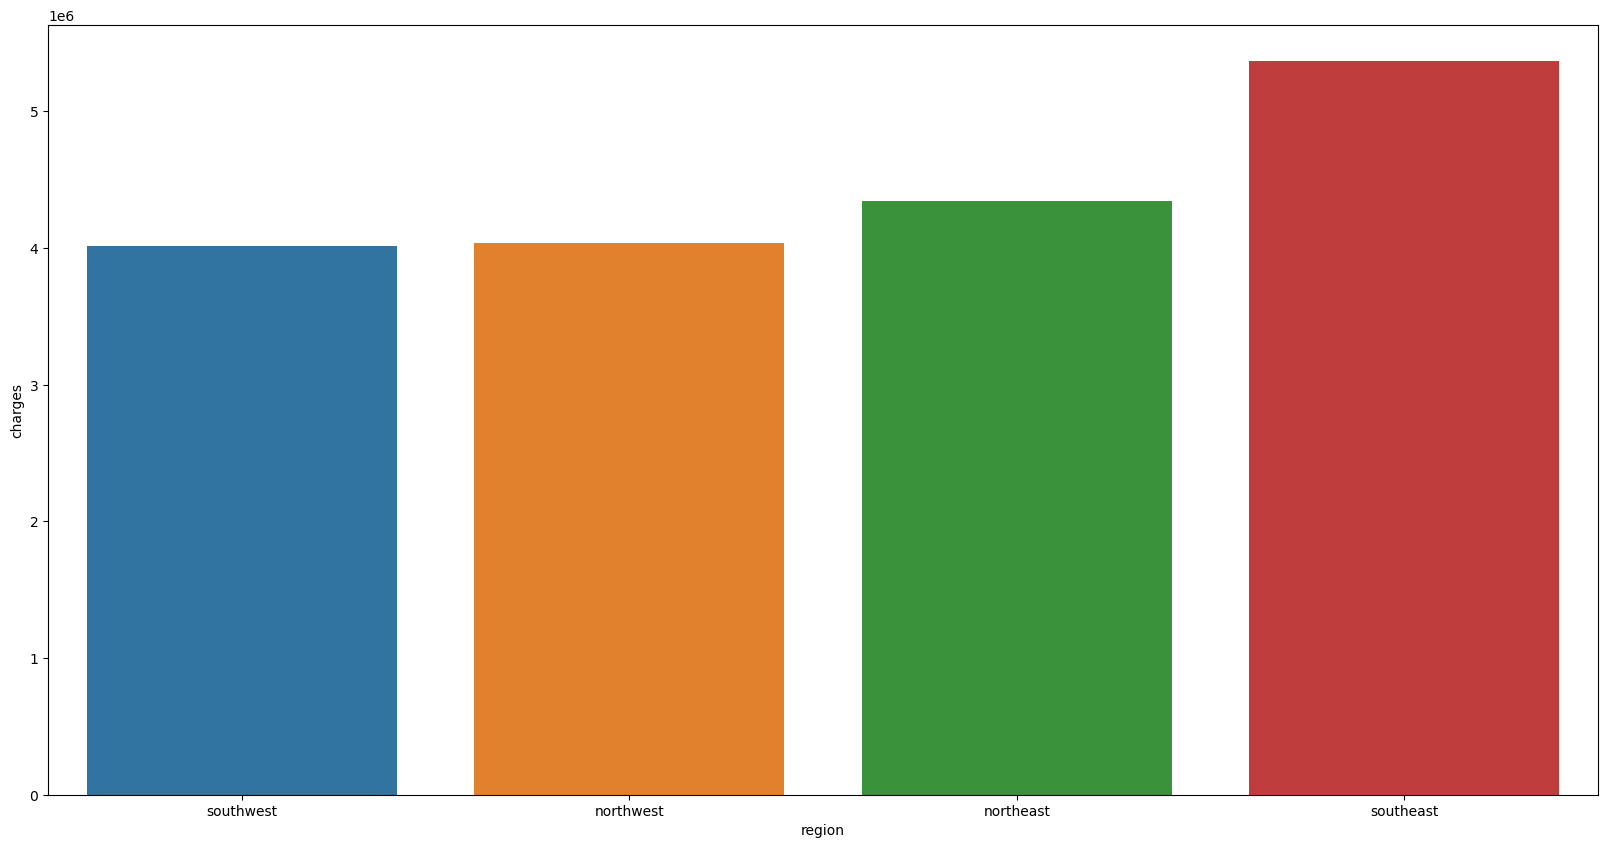

In [157]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,10))
ax = sns.barplot(x = charges.index, y = charges)

**Insights**

The highest amount of charges are in the Southeast while the lowest are in the Southwest. Based on this, let's see how charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior.


## Charges by region and number of children

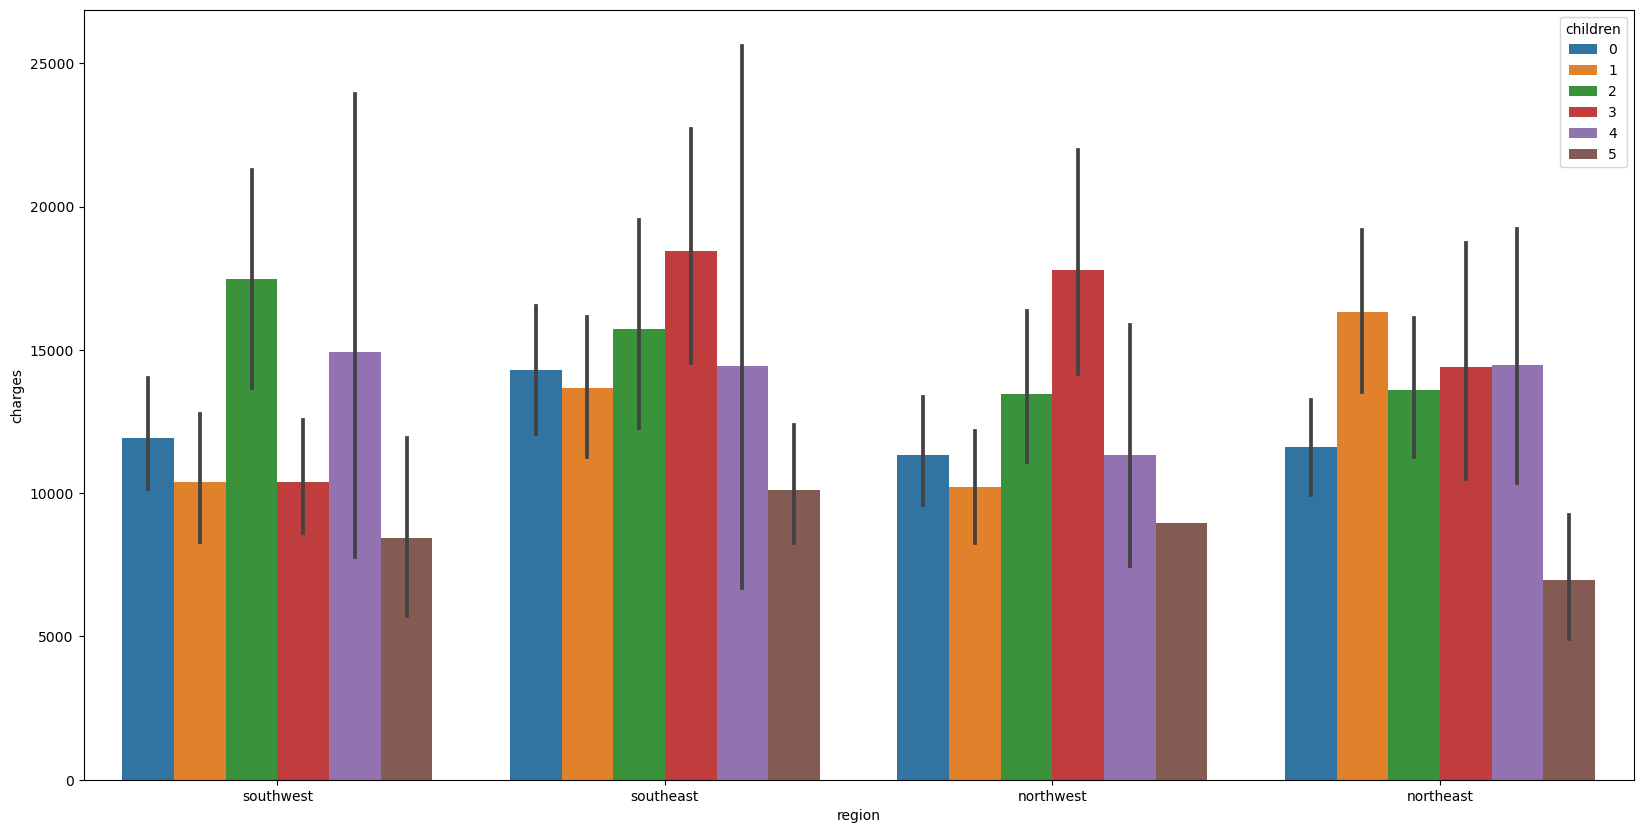

In [158]:
# Setting children as hue parameter
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = data)

**Insights**

It seems that there is not a statistical difference in terms of how the number of children in a particular region affects charges.


## Charges by region and gender

<AxesSubplot:xlabel='region', ylabel='charges'>

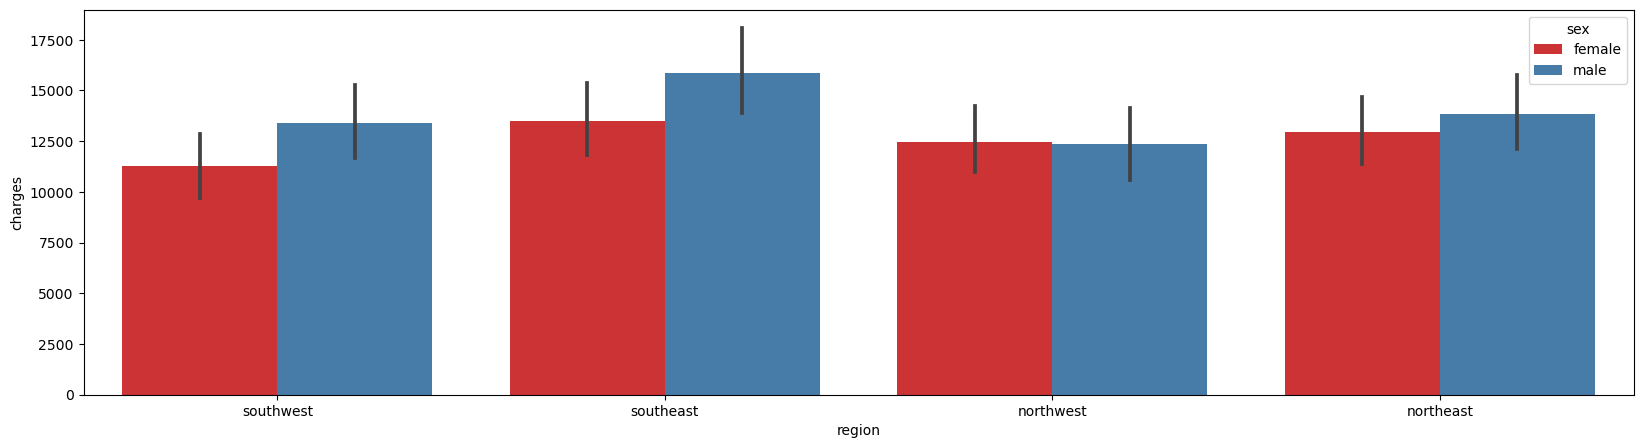

In [159]:
# setting Sex as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data =data, palette = 'Set1')

**Insights**

Again, similar to the previous graph, it seems that there is not a statistical difference in terms of how gender in a particular region affects charges

## Charges by region and smoking behavior

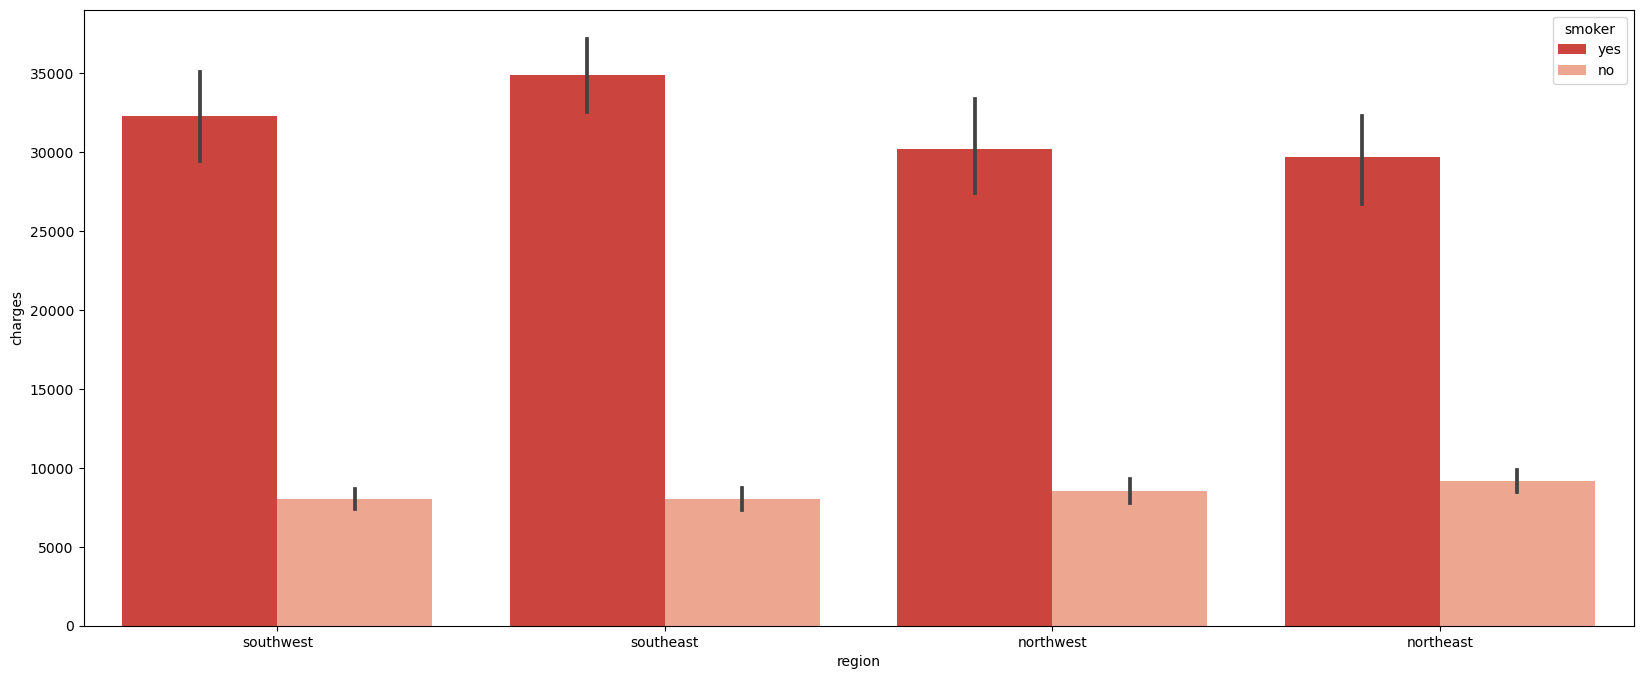

In [160]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = data, palette = 'Reds_r')

**Insights**

In contrast to the other factors, there seems to be a statistical significance in terms of how smoking behavior in a region affects charges.

From these bar charts, we can see that smoking behavior by region significantly affected medical charges. So, let's see the correlation between non-categorical variables (age, bmi, and children) with medical charges (evaluated based on smoking behavior).



## Charges by age, bmi, and children based on smoking behavior

Text(0.5, 1.0, 'Number of children vs Medical Charges')

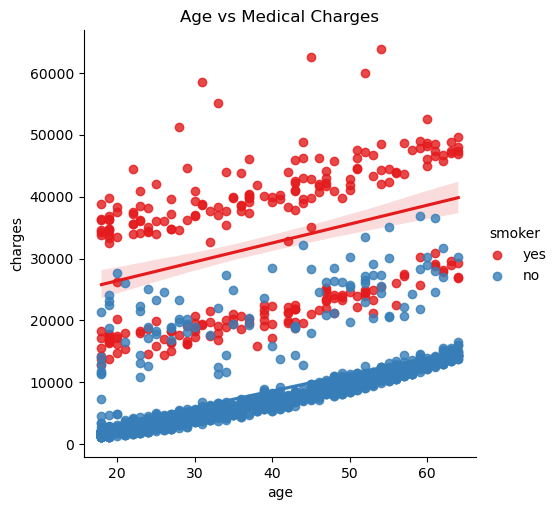

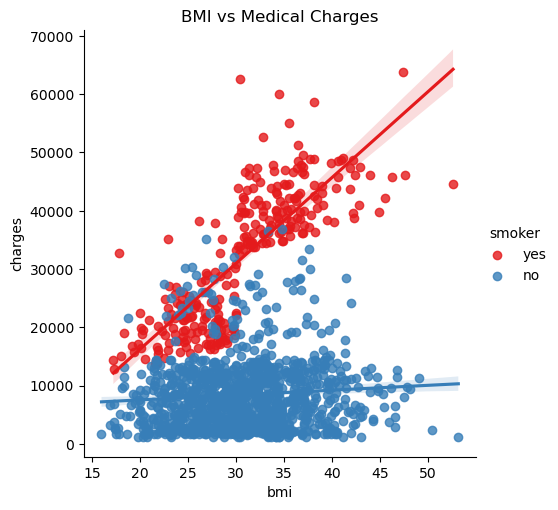

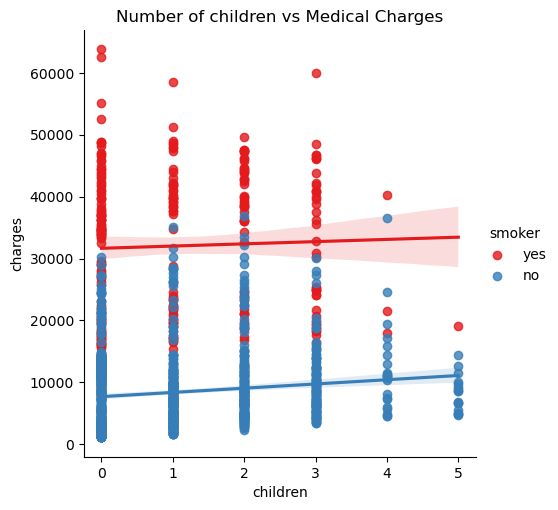

In [161]:
ax = sns.lmplot(x = 'age', y = 'charges', data = data, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = data, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = data, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

**Insights**

Based on the analysis,

We know that smoking has a great impact on medical costs.

Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.

# DATA PREPROCESSING

In [162]:
data.isnull().sum() #Checking missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there is no null value in data

## Checking Outliers

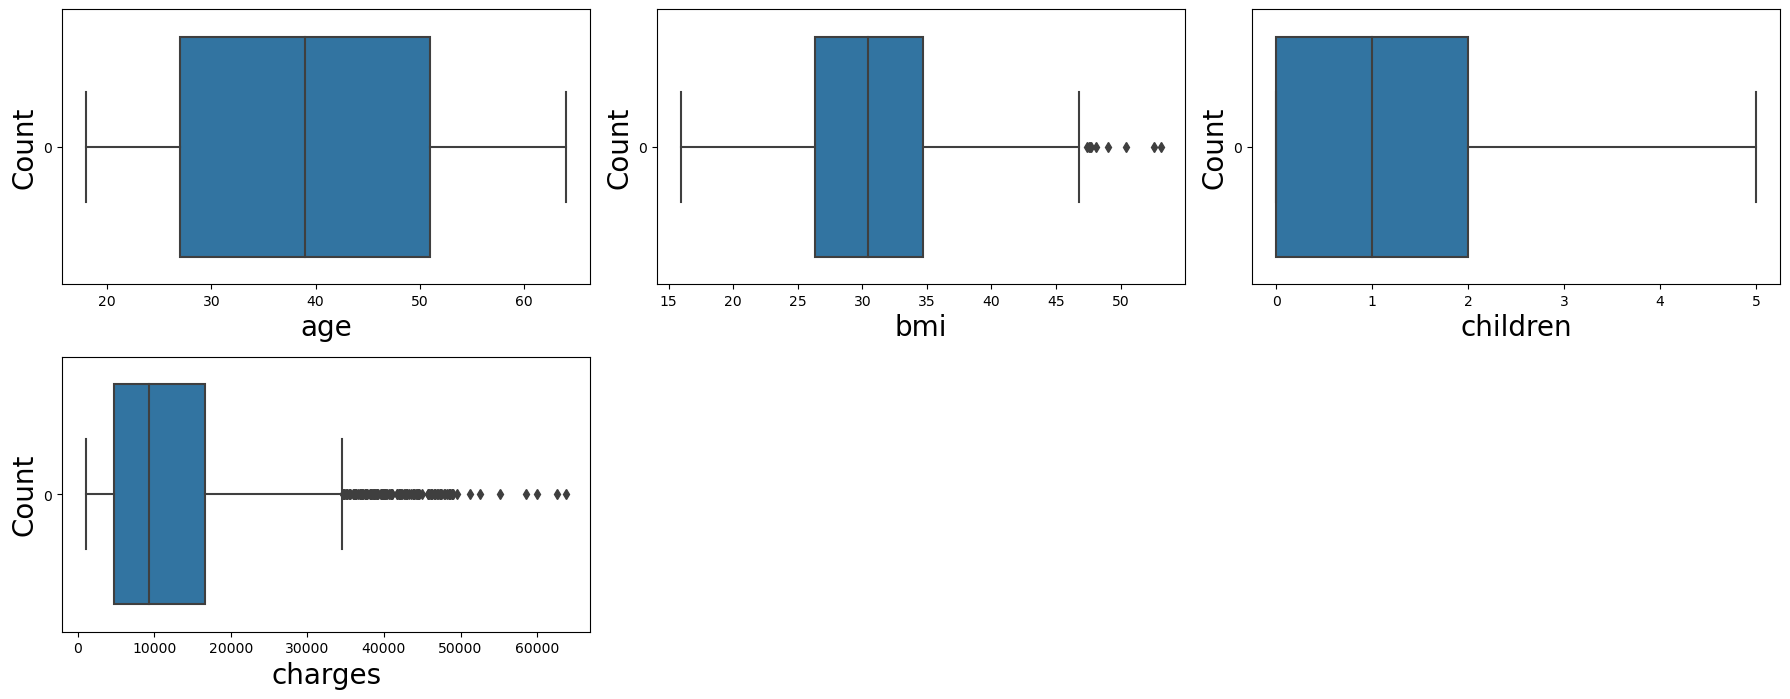

In [163]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1
for column in integer_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(integer_columns[column],orient='h')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

BMI and charges columns have outliers.Charges column is our target variable so we will remove outliers only form BMI column.

In [164]:
#Handling outliers from BIM
from scipy import stats
IQR= stats.iqr(data.bmi,interpolation='midpoint')
IQR

8.384999999999998

In [165]:
Q1= data.bmi.quantile(0.25)
Q3= data.bmi.quantile(0.75)
print(Q1)
Q3

26.29625


34.69375

In [166]:
low_limit= Q1- 1.5*IQR
upp_limit= Q3+ 1.5*IQR
print(low_limit)
upp_limit

13.718750000000004


47.271249999999995

In [167]:
lower=data.loc[data['bmi']<low_limit]
lower

,age,sex,bmi,children,smoker,region,charges


In [168]:
upper=data.loc[data['bmi']>upp_limit]
upper

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [169]:
upper=data.loc[data['bmi']>upp_limit,'bmi']=np.median(data.bmi)

In [170]:
upper=data.loc[data['bmi']>upp_limit]#Checking wether outlier is handled or not
upper

,age,sex,bmi,children,smoker,region,charges


All outliers are removed successfully

In [171]:
#Handling catagorical value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


sex,smoker and region are catagorical columns,let's convert them into integer.

In [172]:
#SEX
data.sex=data.sex.map({'male':1,'female':0})
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [173]:
#SMOKER
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [174]:
data.smoker=data.smoker.map({'yes':1,'no':0})
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [175]:
#REEGION
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [176]:
data.region=data.region.map({'northeast':0,'northwest':1,'southwest':2,'southeast':3})
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


### Scaling the data

In [177]:
## seprate independent and dependent variable
X = data.iloc[:,:-1] # this is all my input column
y = data.iloc[:,-1] # this is target valriable.

In [178]:
# import Standscaller for scalling data also we can use min-max scaler but i prefred standardscalet
from sklearn.preprocessing import StandardScaler

In [179]:
scaler=StandardScaler()
scaler

StandardScaler()

In [180]:
scaled_data = scaler.fit_transform(X)
scaled_data

array([[-1.43876426, -1.0105187 , -0.44701868, -0.90861367,  1.97058663,
         0.40287427],
       [-1.50996545,  0.98959079,  0.54826883, -0.07876719, -0.5074631 ,
         1.28800691],
       [-0.79795355,  0.98959079,  0.41771153,  1.58092576, -0.5074631 ,
         1.28800691],
       ...,
       [-1.50996545, -1.0105187 ,  1.07049806, -0.90861367, -0.5074631 ,
         1.28800691],
       [-1.29636188, -1.0105187 , -0.80308406, -0.90861367, -0.5074631 ,
         0.40287427],
       [ 1.55168573, -1.0105187 , -0.2486394 , -0.90861367,  1.97058663,
        -0.48225837]])

In [181]:
x=pd.DataFrame(scaled_data, columns=X.columns) # arrange in tabular form
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.447019,-0.908614,1.970587,0.402874
1,-1.509965,0.989591,0.548269,-0.078767,-0.507463,1.288007
2,-0.797954,0.989591,0.417712,1.580926,-0.507463,1.288007
3,-0.441948,0.989591,-1.327857,-0.908614,-0.507463,-0.482258
4,-0.513149,0.989591,-0.280855,-0.908614,-0.507463,-0.482258


## Checking Correlation

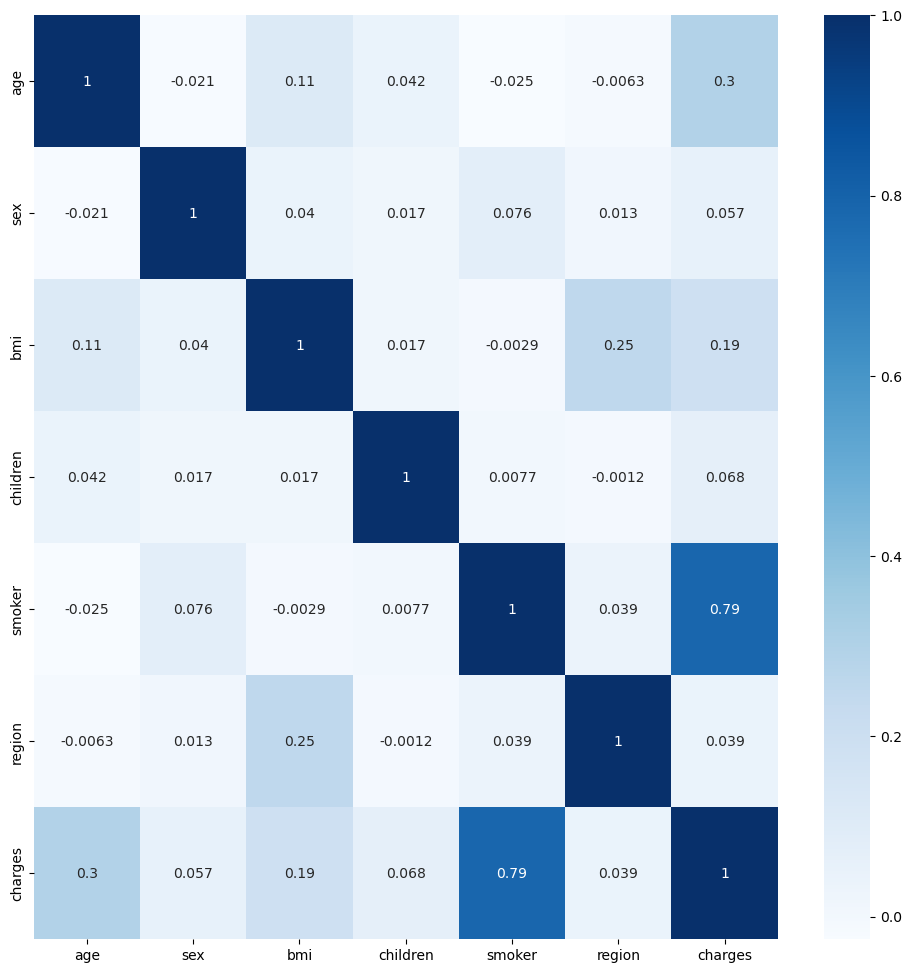

In [182]:
f, axs = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

No correlation except smoker and charges.

# Train Test Split

In [183]:
#we already seprated data into independent and dependent feature during scalling the data

In [184]:
x.head(2) # Independent feature( input column in dataset)

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.447019,-0.908614,1.970587,0.402874
1,-1.509965,0.989591,0.548269,-0.078767,-0.507463,1.288007


In [185]:
y.head(2) # dependent feature(targate variable)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [186]:
# importing train test split for traning and testing the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [187]:
# Shape of the training and testing dataset
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

# Model selection

 - Model selection is a crucial step when working on machine learning projects that can significantly impact the accuracy and efficiency of the projects.
 - since it is Regression problem so we will select diffrent algorithm to check the accuracy and  how this data is performing

## Linear Regression

This is commonly used in predictive analysis. 

This regression estimates are used to explain the relationship between one dependent variable and one or more independent variables

In [188]:
# Training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [189]:
y_predict = reg.predict(x_test)

In [190]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


y_train_predict=reg.predict(x_train)
train_score=r2_score(y_train,y_train_predict)
print('train_score',train_score)

##prediciton on test data

y_test_predict=reg.predict(x_test)
test_score=r2_score(y_test,y_test_predict)
print('test_score',test_score)

train_score 0.7427271468729757
test_score 0.7721002640891023


In [191]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predict))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 4252.08268236996
Mean Square Error: 35381144.90747705
Root Mean Square Error: 5948.205183706851


In [192]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': y_predict})
Actual_predicted.head(7)

,Actual Revenue,Predicted Revenue
764,9095.06825,8748.122880
887,5272.17580,7111.505192
890,29330.98315,36805.302223
1293,9301.89355,9429.456765
259,33750.29180,27124.260195
1312,4536.25900,11397.873529
899,2117.33885,101.905987


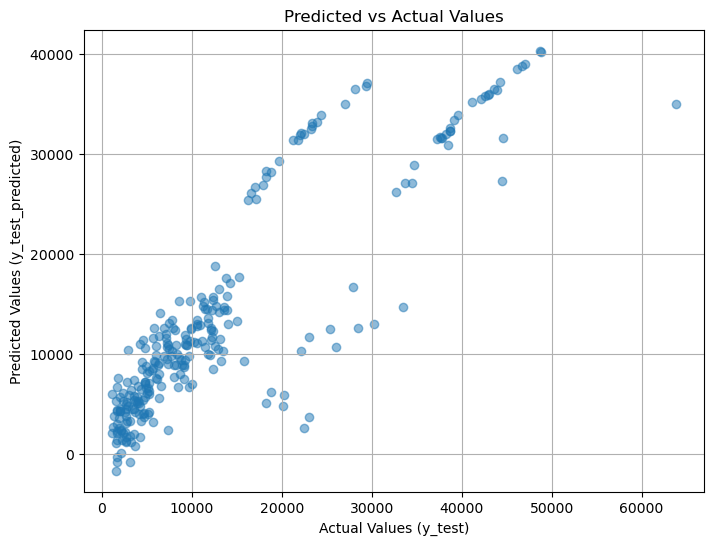

In [193]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(y_test, y_predict, alpha=0.5)  # alpha controls point transparency for better visualization
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_predicted)')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)

# Show the plot
plt.show()


# Random Forest Regressor

In [231]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor as rfr
rf_reg = rfr(n_estimators = 10,random_state = 0)

rf_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [232]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [233]:
y_train_predict=rf_reg.predict(x_train)
train_score=r2_score(y_train,y_train_predict)
print('train_score',train_score)

##prediciton on test data

y_test_predict=rf_reg.predict(x_test)
test_score=r2_score(y_test,y_test_predict)
print('test_score',test_score)

train_score 0.9611269645812031
test_score 0.8618636170625067


In [197]:
meanAbErr = metrics.mean_absolute_error(y_test, y_test_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_test_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 2491.7372318544776
Mean Square Error: 21445498.22390771
Root Mean Square Error: 4630.928440810515


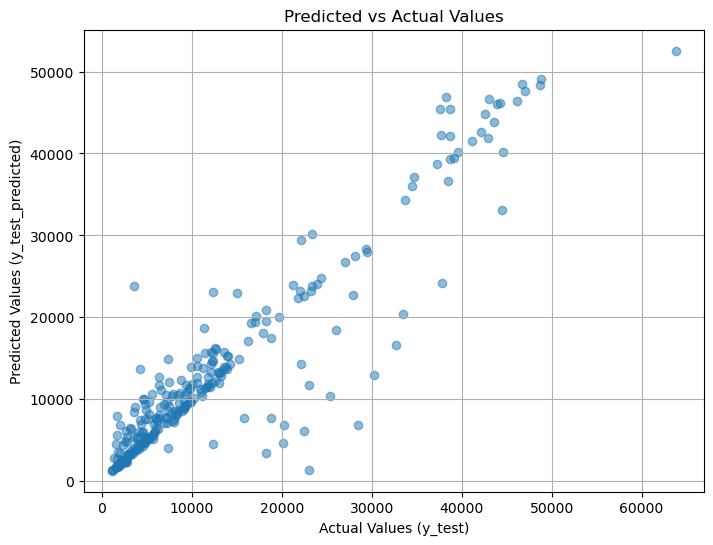

In [198]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(y_test, y_test_predict, alpha=0.5)  # alpha controls point transparency for better visualization
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_predicted)')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)

# Show the plot
plt.show()

# DECISSION TREE REGRESSOR

In [199]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree from sklearn.tree

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [200]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [201]:
y_train_pred=model.predict(x_train)
train_score=r2_score(y_train,y_train_pred)
print('train_score',train_score)

##prediciton on test data

y_test_pred=model.predict(x_test)
test_score=r2_score(y_test,y_test_pred)
print('test_score',test_score)

train_score 0.9983078124756305
test_score 0.7252394109238363


In [202]:
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 3135.4561739888063
Mean Square Error: 42656232.918006845
Root Mean Square Error: 4417.5989033481665


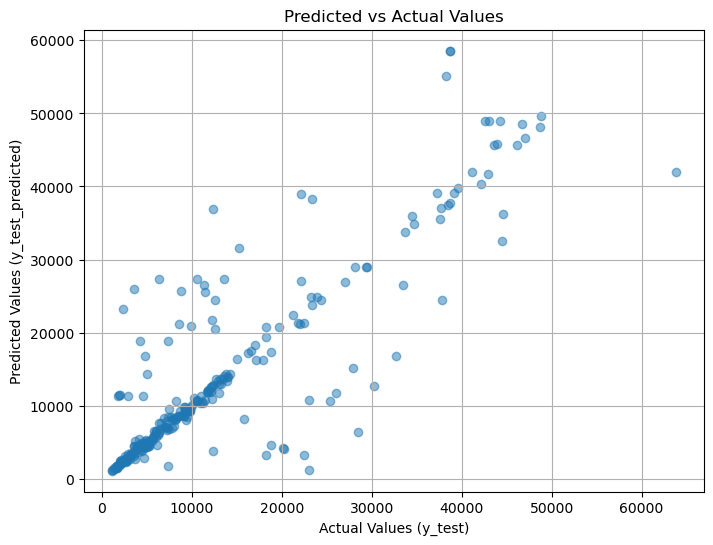

In [203]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(y_test, predictions , alpha=0.5)  # alpha controls point transparency for better visualization
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_predicted)')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)

# Show the plot
plt.show()

# Ada Boost Regressor

In [204]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
# Create the AdaBoostRegressor model
adaboost_model = AdaBoostRegressor(
    n_estimators=50,  # Number of weak learners (default is 50)
    learning_rate=1.0,  # Learning rate (default is 1.0)
    loss='linear'  # Loss function for updating weights (default is 'linear')
)

# Train the model on the training data
adaboost_model.fit(x_train, y_train)

# Make predictions on the test data
y_prediction = adaboost_model.predict(x_test)
y_prediction

array([11280.54477957,  7170.00539775, 26261.59222325, 11280.54477957,
       36851.96855209,  7170.00539775,  7170.00539775, 14704.89006226,
        7170.00539775, 14077.78138804, 19351.85090522, 10719.36767517,
        7170.00539775, 44892.77906587, 44892.77906587, 44892.77906587,
       14077.78138804, 44892.77906587,  9732.20451097, 26261.59222325,
       10719.36767517, 10719.36767517,  7170.00539775,  7170.00539775,
       14077.78138804, 14077.78138804, 14704.89006226, 10719.36767517,
       14077.78138804,  7170.00539775, 10719.36767517, 14077.78138804,
        7170.00539775, 10719.36767517,  7170.00539775,  9732.20451097,
        7170.00539775,  9732.20451097, 26261.59222325, 44892.77906587,
       10719.36767517,  7170.00539775, 14077.78138804, 14704.89006226,
       10719.36767517, 19240.75327181, 10719.36767517, 10719.36767517,
       44892.77906587, 10719.36767517, 14704.89006226,  7170.00539775,
        7170.00539775,  7170.00539775, 14077.78138804, 14077.78138804,
      

In [206]:
y_train_predict=adaboost_model.predict(x_train)
train_score=r2_score(y_train,y_train_predict)
print('train_score',train_score)

##prediciton on test data

y_test_predict=adaboost_model.predict(x_test)
test_score=r2_score(y_test,y_test_predict)
print('test_score',test_score)

train_score 0.823500568281339
test_score 0.810144271310287


In [207]:
meanAbErr = metrics.mean_absolute_error(y_test, y_prediction)
meanSqErr = metrics.mean_squared_error(y_test, y_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 4396.280463142862
Mean Square Error: 29474861.045524247
Root Mean Square Error: 5429.075524021032


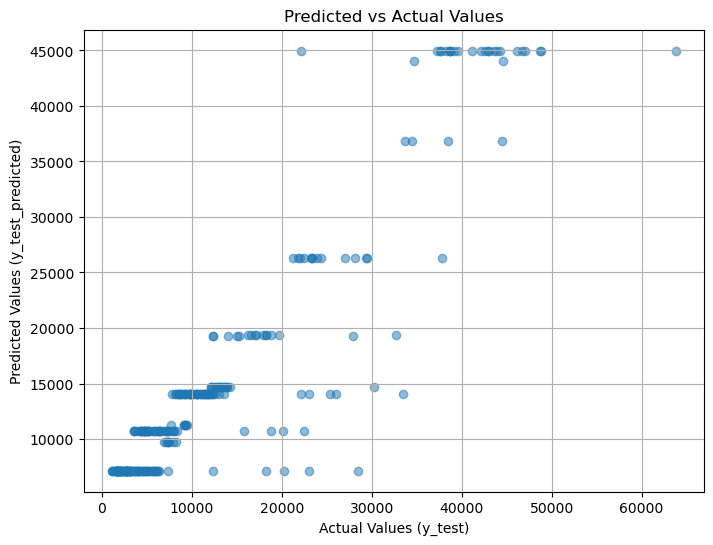

In [208]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(y_test, y_prediction, alpha=0.5)  # alpha controls point transparency for better visualization
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_predicted)')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)

# Show the plot
plt.show()

#  GradientBoostingRegressor


In [209]:
from sklearn.ensemble import GradientBoostingRegressor
# Create the GradientBoostingRegressor model
gradient_boosting_model = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages (trees) to be used (default is 100)
    learning_rate=0.1,  # Learning rate shrinks the contribution of each tree (default is 0.1)
    max_depth=3,  # Maximum depth of the individual trees (default is 3)
    loss='ls'  # Loss function to be optimized ('ls' stands for least squares regression, default is 'ls')
)

# Train the model on the training data
gradient_boosting_model.fit(x_train, y_train)

# Make predictions on the test data
y_prd = gradient_boosting_model.predict(x_test)
y_prd

array([10877.52709337,  5906.83543158, 27771.8436253 ,  9873.38713783,
       33602.4371645 ,  5537.85544394,  2691.60247047, 15581.80176888,
        4403.15141608, 10688.16815196, 17864.38171986,  8128.67628181,
        4626.94226349, 44998.36592181, 47548.40372663, 44600.89105993,
       11253.34476776, 45348.00049761,  9131.31077935, 23841.09005053,
        5348.20483919,  9217.4315476 ,  1816.5219116 ,  4901.43212488,
       11502.68823916, 13114.91691065, 14951.75397989,  6952.64141607,
       11534.86047403,  1710.78710781,  7855.43230245, 12052.79070526,
        2897.52372482,  6073.67185621,  4698.59662582, 10492.25041186,
        3629.81579247,  9375.75954008, 24907.46430533, 40440.45035035,
        7344.41913673,  3825.52970022, 13291.21232013, 14286.91039198,
        7197.12131261, 15703.68845023,  6538.36730897,  6636.37184224,
       42114.05678138,  6088.96127123, 15007.70410503,  2312.82404345,
        7677.67284533,  2386.34872548, 12580.75856783, 11109.12504274,
      

In [210]:
y_train_predict=gradient_boosting_model.predict(x_train)
train_score=r2_score(y_train,y_train_predict)
print('train_score',train_score)

##prediciton on test data

y_test_predict=gradient_boosting_model.predict(x_test)
test_score=r2_score(y_test,y_test_predict)
print('test_score',test_score)

train_score 0.9017113950550225
test_score 0.8745147795479898


In [211]:
meanAbErr = metrics.mean_absolute_error(y_test, y_prd)
meanSqErr = metrics.mean_squared_error(y_test, y_prd)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_prd))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 2428.1374989213077
Mean Square Error: 19481421.296140134
Root Mean Square Error: 4413.776307895557


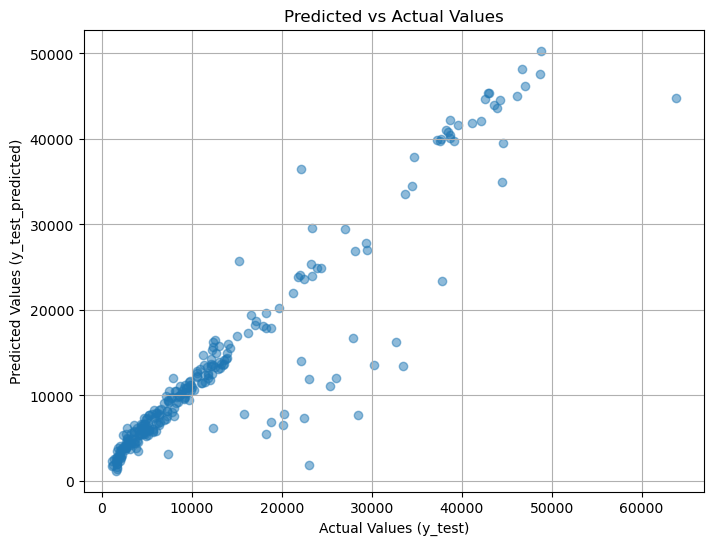

In [212]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(y_test, y_prd, alpha=0.5)  # alpha controls point transparency for better visualization
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_predicted)')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)

# Show the plot
plt.show()


# XGB Regressor

In [213]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specify the regression objective
    n_estimators=100,              # Number of boosting rounds (trees)
    learning_rate=0.1,             # Learning rate (step size shrinkage)
    max_depth=3                    # Maximum depth of individual trees
)

In [214]:
xgb_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [215]:
print("Training Score:",xgb_model.score(x_train, y_train))
print("Test Score:",xgb_model.score(x_test,y_test))

Training Score: 0.8942364758742853
Test Score: 0.8742973299469631


In [216]:
xgb_prediction = xgb_model.predict(x_test)
xgb_prediction[:5]

array([10785.991 ,  5815.266 , 27368.62  ,  9808.2295, 33617.74  ],
      dtype=float32)

In [217]:
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

In [218]:
meanAbErr = metrics.mean_absolute_error(y_test,xgb_prediction)
meanSqErr = metrics.mean_squared_error(y_test, xgb_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 2449.899637351242
Mean Square Error: 19515180.070862927
Root Mean Square Error: 4417.5989033481665


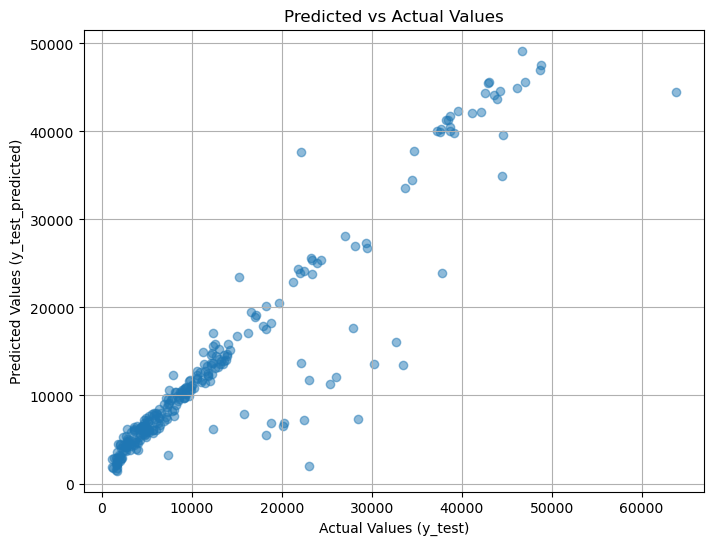

In [219]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(y_test,xgb_prediction , alpha=0.5)  # alpha controls point transparency for better visualization
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_predicted)')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)

# Show the plot
plt.show()

# HYPERPARAMETER TUNING

 -  By using Hyperparameter it will Prevent Overfitting, underfitting and Optimize Performance

# Linear Regressor

In [257]:
# Define hyperparameter grid
from sklearn.model_selection import train_test_split, RandomizedSearchCV

param_dist = {
    'fit_intercept': [True, False],   # Whether to calculate the intercept for this model
    'normalize': [True, False],       # Whether to normalize the features before regression
}

In [258]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    reg, param_distributions=param_dist, n_iter=100,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)

In [259]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'normalize': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error')

In [260]:
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", -random_search.best_score_)

Best Hyperparameters:  {'normalize': True, 'fit_intercept': True}
Best Score:  37667262.20570888


In [261]:
# Get the best model
best_linear_regressor = random_search.best_estimator_

# Evaluate the best model on the test set
test_predictions = best_linear_regressor.predict(x_test)


In [262]:
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

In [263]:
# Calculate evaluation metrics (e.g., MSE, MAE, R-squared)

print("Test Mean Squared Error:", mse)
print("Test Mean Absolute Error:", mae)
print("Test R-squared:", r2)

Test Mean Squared Error: 35381144.90747705
Test Mean Absolute Error: 4252.08268236996
Test R-squared: 0.7721002640891023


# Random Forest Regressor

In [234]:
# Define hyperparameter grid
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Define a range of hyperparameters to search over
param_dist = {
    'n_estimators': (10, 200),           # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider at each split
    'max_depth': (1, 20),               # Maximum depth of the tree
    'min_samples_split': (2, 20),       # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 20),        # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}


In [235]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_reg, param_distributions=param_dist, n_iter=100,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)


In [236]:
# Fit the model to the data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': (1, 20),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': (1, 20),
                                        'min_samples_split': (2, 20),
                                        'n_estimators': (10, 200)},
                   random_state=42, scoring='neg_mean_squared_error')

In [132]:
# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", -random_search.best_score_)

Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Best Score:  21656601.681704093


In [133]:
# Get the best model
best_rf_regressor = random_search.best_estimator_

# Evaluate the best model on the test set
test_prediction = best_rf_regressor.predict(x_test)


In [134]:
# Calculate evaluation metrics (e.g., MSE, MAE, R-squared)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, test_prediction)
mae = mean_absolute_error(y_test, test_prediction)
r2 = r2_score(y_test, test_prediction)

In [135]:
print("Test Mean Squared Error:", mse)
print("Test Mean Absolute Error:", mae)
print("Test R-squared:", r2)

Test Mean Squared Error: 19690204.770371806
Test Mean Absolute Error: 2561.9945088622585
Test R-squared: 0.8731699474696502


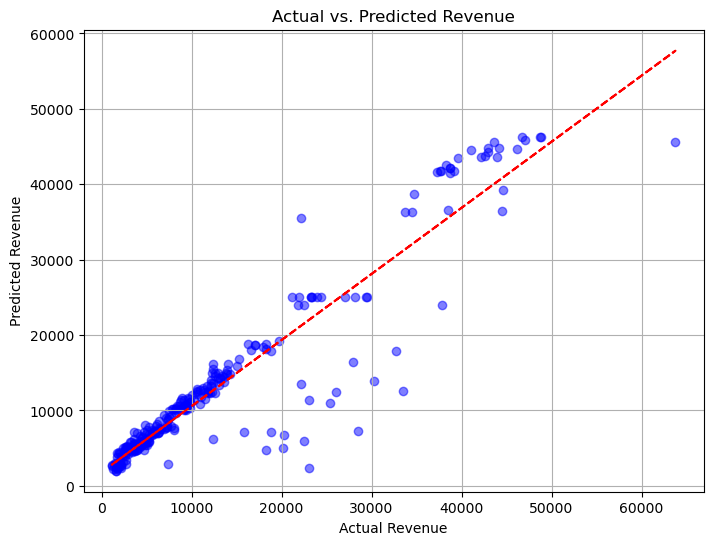

In [137]:
# Create a DataFrame to store the data
actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': test_prediction})

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_predicted['Actual Revenue'], actual_predicted['Predicted Revenue'], c='b', alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.grid(True)

# Optionally, you can add a line of best fit
import numpy as np
z = np.polyfit(actual_predicted['Actual Revenue'], actual_predicted['Predicted Revenue'], 1)
p = np.poly1d(z)
plt.plot(actual_predicted['Actual Revenue'], p(actual_predicted['Actual Revenue']), 'r--')

plt.show()

# XGB Regressor

In [105]:
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate (step size shrinkage)
    'max_depth': [3, 4, 5],                  # Maximum depth of individual trees
    'min_child_weight': [1, 2, 4],           # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.7, 0.8, 0.9],            # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.7, 0.8, 0.9]      # Fraction of features used for fitting the trees
}

In [106]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=100,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)

In [107]:
# Fit the model to the data
random_search.fit(x_train, y_train)


[13:51:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                           

In [113]:
# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", -random_search.best_score_)

Best Hyperparameters:  {'subsample': 0.8, 'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 14, 'max_depth': 4, 'learning_rate': 0.01, 'alpha': 0.9}
Best Score:  22433732.212800026


In [114]:
# Get the best model
best_xgb_regressor = random_search.best_estimator_

# Evaluate the best model on the test set
test_pred = best_xgb_regressor.predict(x_test)


In [115]:
# Calculate evaluation metrics (e.g., MSE, MAE, R-squared)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, test_pred)
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

In [116]:
print("Test Mean Squared Error:", mse)
print("Test Mean Absolute Error:", mae)
print("Test R-squared:", r2)

Test Mean Squared Error: 19682242.67100878
Test Mean Absolute Error: 2401.1155561792207
Test R-squared: 0.8732212335528697


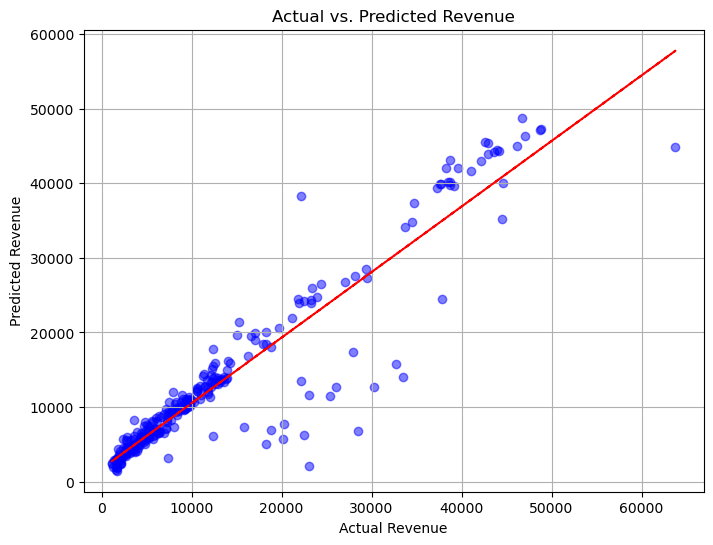

In [117]:
# Create a DataFrame to store the data
actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': test_pred})

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_predicted['Actual Revenue'], actual_predicted['Predicted Revenue'], c='b', alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.grid(True)

# Optionally, you can add a line of best fit
import numpy as np
z = np.polyfit(actual_predicted['Actual Revenue'], actual_predicted['Predicted Revenue'], 1)
p = np.poly1d(z)
plt.plot(actual_predicted['Actual Revenue'], p(actual_predicted['Actual Revenue']), 'r--')

plt.show()

#  GradientBoostingRegressor


In [98]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Define a range of hyperparameters to search over
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2, 0.3],   # Learning rate
    'max_depth': np.arange(3, 10),             # Maximum depth of the tree
    'min_samples_split': np.arange(2, 21),     # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 21),      # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0],             # Fraction of samples used for training
    'alpha': [0.7, 0.8, 0.9],                 # Regularization parameter
}


In [99]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    gradient_boosting_model, param_distributions=param_dist, n_iter=100,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)

In [100]:
# Fit the model to the data
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(loss='ls'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [101]:
# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", -random_search.best_score_)

Best Hyperparameters:  {'subsample': 0.8, 'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 14, 'max_depth': 4, 'learning_rate': 0.01, 'alpha': 0.9}
Best Score:  22271040.607132103


In [102]:
# Get the best model
best_gb_regressor = random_search.best_estimator_

# Evaluate the best model on the test set
test_predictions = best_gb_regressor.predict(x_test)

In [103]:
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print("Test Mean Squared Error:", mse)
print("Test Mean Absolute Error:", mae)
print("Test R-squared:", r2)

Test Mean Squared Error: 19640446.168754444
Test Mean Absolute Error: 2463.1258773908044
Test R-squared: 0.873490456379058


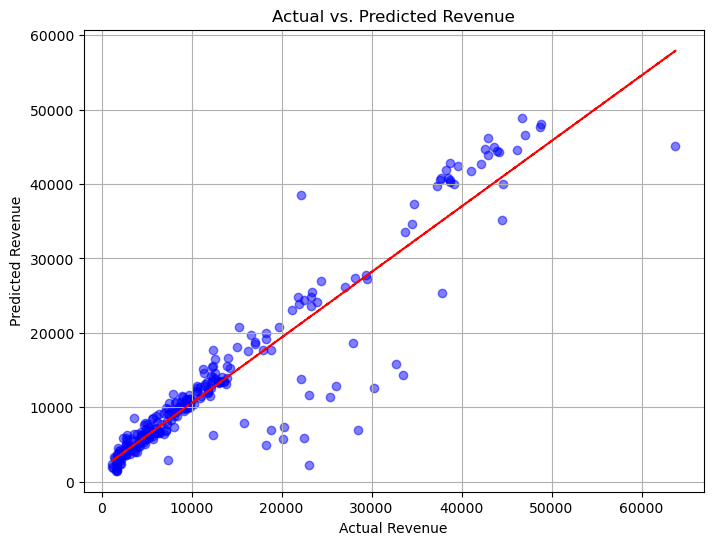

In [104]:
# Create a DataFrame to store the data
actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': test_predictions})

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_predicted['Actual Revenue'], actual_predicted['Predicted Revenue'], c='b', alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.grid(True)

# Optionally, you can add a line of best fit
import numpy as np
z = np.polyfit(actual_predicted['Actual Revenue'], actual_predicted['Predicted Revenue'], 1)
p = np.poly1d(z)
plt.plot(actual_predicted['Actual Revenue'], p(actual_predicted['Actual Revenue']), 'r--')

plt.show()

# Ada Boost Regressor

In [110]:
# Define hyperparameter grid
param_dist = {
    'n_estimators': (50, 300),     # Number of base estimators
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
}

In [111]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
adaboost_model.fit(x_train, y_train)
    , param_distributions=param_dist, n_iter=100,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)


In [112]:
# Fit the model to the data
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'n_estimators': (50, 300)},
                   random_state=42, scoring='neg_mean_squared_error')

In [113]:
# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", -random_search.best_score_)

Best Hyperparameters:  {'n_estimators': 50, 'learning_rate': 0.01}
Best Score:  22844196.54287087


In [114]:
# Get the best model
best_adaboost_regressor = random_search.best_estimator_

# Evaluate the best model on the test set
test_predictions = best_adaboost_regressor.predict(x_test)

In [115]:
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

In [116]:
print("Test Mean Squared Error:", mse)
print("Test Mean Absolute Error:", mae)
print("Test R-squared:", r2)

Test Mean Squared Error: 21993188.754000053
Test Mean Absolute Error: 3025.0018249127675
Test R-squared: 0.8583357909422568


# <center> -:CONCLUSION:-

### - In this project we have to predict Insurance cost on the basis of given features,for that i used different ML Algorithms:-


  - 1. Linear Regression
  - 2. RandomForest Regression
  - 3. Decision Tree Regression
  - 4. AdaBoost Regression
  - 5. GradientBoosting Regression
  - 6. XGB Regression
  


### Out of these Algorithm there is performed some algorithm better than other:

 - RandomForest Regression
 - GradientBoosting Regression
 - XGB Regression


-------

RESULT:

- _The XGB Regression model has the highest R2 Score, indicating the best fit to the data among all models._              


- _The GradientBoosting Regression model has a perfect training score but XGB Regression model perfomed well._                                                                                           


- _Random Forest,Decision Tree Regression , and AdaBoost Regression models also have good performance but are outperformed by XGB Regression._  


- _Linear Regression model have relatively lower R2 Scores compared to the XGB ._  


# BEST MODEL: 

_The best model based on the provided metrics is the **XGB Regression Model**. It has the highest R2 Score and the lowest errors, indicating better predictive performance. However, it's essential to consider the specific context of your problem and potentially perform further analysis or hyperparameter tuning to optimize the model's performance._  

___